# Part-1 Applying Different Estimators For Simple Classification Problem

In [175]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['iris-dataset', 'wine-quality']


In [118]:
df = pd.read_csv('../input/iris-dataset/iris.data.csv', header=None)

In [119]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [120]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [121]:
y = df.iloc[:,4].values

In [122]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [123]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [124]:
le = le.fit(y)

In [125]:
y = le.transform(y)

In [126]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [127]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [128]:
X = df.iloc[:,[2,3]].values

In [129]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.5, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [130]:
X.shape, y.shape

((150, 2), (150,))

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [132]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((105, 2), (105,), (45, 2), (45,))

In [133]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


In [134]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [135]:
X_train_std

array([[-1.33269725, -1.30380366],
       [-1.16537974, -1.30380366],
       [ 0.84243039,  1.44465434],
       [ 1.0655204 ,  1.18289644],
       [-1.44424226, -1.30380366],
       [ 1.0097479 ,  1.57553329],
       [ 1.56747294,  1.18289644],
       [-1.44424226, -1.30380366],
       [ 1.12129291,  0.52850167],
       [ 0.45202286,  0.13586482],
       [-0.27301968, -0.25677204],
       [ 0.06161534,  0.26674377],
       [-1.38846976, -1.30380366],
       [ 0.50779537,  0.00498586],
       [ 0.11738784,  0.13586482],
       [ 0.73088538,  0.92113853],
       [-1.05383474, -1.30380366],
       [-0.16147468, -0.25677204],
       [ 0.06161534,  0.00498586],
       [-1.22115225, -1.30380366],
       [ 0.56356787,  0.79025958],
       [ 1.73479045,  1.44465434],
       [ 0.39625036,  0.39762272],
       [ 0.39625036,  0.13586482],
       [ 0.00584283, -0.12589309],
       [ 1.0097479 ,  1.57553329],
       [ 0.50779537,  0.26674377],
       [ 1.0097479 ,  0.26674377],
       [ 1.12129291,

In [136]:
X_test_std

array([[ 0.89820289,  1.44465434],
       [-1.16537974, -1.04204575],
       [-1.33269725, -1.17292471],
       [ 0.39625036,  0.65938063],
       [ 0.34047786,  0.26674377],
       [ 0.11738784,  0.13586482],
       [ 1.12129291,  0.79025958],
       [ 0.39625036,  0.39762272],
       [ 0.84243039,  0.92113853],
       [-1.38846976, -1.04204575],
       [-1.27692475, -1.04204575],
       [ 0.61934037,  0.79025958],
       [-1.33269725, -1.30380366],
       [-0.27301968, -0.25677204],
       [-1.33269725, -1.30380366],
       [ 0.56356787,  0.26674377],
       [ 0.73088538,  1.44465434],
       [ 0.39625036,  0.39762272],
       [ 0.28470535,  0.13586482],
       [ 0.78665788,  1.05201748],
       [ 1.17706541,  1.18289644],
       [-1.33269725, -1.43468261],
       [ 0.34047786,  0.26674377],
       [ 0.61934037,  1.05201748],
       [ 0.22893285,  0.13586482],
       [ 0.50779537,  0.52850167],
       [-0.4403372 , -0.12589309],
       [ 1.0655204 ,  1.70641225],
       [-1.22115225,

# Training a perceptron via scikit-learn

In [137]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
      fit_intercept=True, max_iter=40, n_iter=None, n_iter_no_change=5,
      n_jobs=None, penalty=None, random_state=1, shuffle=True, tol=None,
      validation_fraction=0.1, verbose=0, warm_start=False)

In [138]:
y_pred = ppn.predict(X_test_std)

In [139]:
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [140]:
print('Misclassified samples: %d' % (y_test != y_pred).sum())

Misclassified samples: 3


In [141]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.93


In [142]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [143]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [144]:
X_combined_std.shape, y_combined.shape

((150, 2), (150,))

In [145]:
y_train.shape, y_test.shape

((105,), (45,))

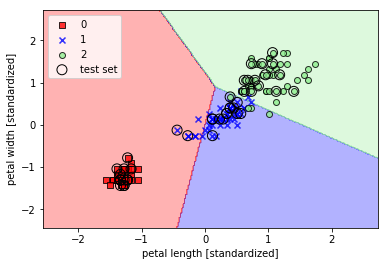

In [146]:
plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [147]:
x1_min, x1_max = X_combined_std[:, 0].min() - 1, X_combined_std[:, 0].max() + 1
x2_min, x2_max = X_combined_std[:, 1].min() - 1, X_combined_std[:, 1].max() + 1

In [148]:
x1_min, x1_max, x2_min, x2_max

(-2.555787268814562, 2.734790447233992, -2.434682612008325, 2.7064122466024303)

In [149]:
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))

In [150]:
xx1.shape, xx2.shape

((258, 265), (258, 265))

In [151]:
nx, ny = (3, 3)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 1, ny)

In [152]:
x

array([0., 1., 2.])

In [153]:
y

array([0. , 0.5, 1. ])

In [154]:
xv, yv = np.meshgrid(x, y)

In [155]:
xv

array([[0., 1., 2.],
       [0., 1., 2.],
       [0., 1., 2.]])

In [156]:
yv

array([[0. , 0. , 0. ],
       [0.5, 0.5, 0.5],
       [1. , 1. , 1. ]])

In [157]:
xv.ravel()

array([0., 1., 2., 0., 1., 2., 0., 1., 2.])

In [158]:
(np.array([xx1.ravel(), xx2.ravel()]).T).shape

(68370, 2)

# Task 1 Use Classifiers: Logistic Regression, SVM and Decision Tree from sklearn

# Part-2 Data Manipulation

In [159]:
from io import StringIO
csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


# Eliminating samples or features with missing values

In [160]:
# remove rows that contain missing values

df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [161]:
# remove columns that contain missing values

df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [162]:
# only drop rows where all columns are NaN

df.dropna(how='all')

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [163]:
# drop rows that have less than 3 real values 

df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [164]:
# only drop rows where NaN appear in specific columns (here: 'C')

df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


# Imputing missing values

In [165]:
# impute missing values via the column mean

from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# Encoding (One Hot Encoding)

In [166]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class2'],
                   ['red', 'L', 13.5, 'class1'],
                   ['blue', 'XL', 15.3, 'class2']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


In [167]:
from sklearn.preprocessing import LabelEncoder
X = df[['color', 'size', 'price']].values

color_le_1 = LabelEncoder()
X[:, 0] = color_le_1.fit_transform(X[:, 0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

In [168]:
color_le_2 = LabelEncoder()
X[:, 1] = color_le_2.fit_transform(X[:, 1])
X

array([[1, 1, 10.1],
       [2, 0, 13.5],
       [0, 2, 15.3]], dtype=object)

In [169]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(
    [('oh_enc', OneHotEncoder(sparse=False), [0, 1]),], remainder='passthrough')

In [170]:
ct.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 10.1],
       [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 13.5],
       [1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 15.3]], dtype=object)

# Wine Dataset

In [171]:
df_wine = pd.read_csv('../input/wine-quality/winequalityN.csv')

In [172]:
df_wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,white,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
9,white,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6


# Task 2 Apply different kind of filtering to clean the data

In [173]:
np.unique(df_wine['type'])

array(['red', 'white'], dtype=object)

# Assignment - Implement a perceptron from scratch and apply it to iris dataset given here.

In [174]:
from IPython.display import Image
Image("../input/percetron-image/Perceptron.PNG")

TypeError: a bytes-like object is required, not 'str'

TypeError: a bytes-like object is required, not 'str'

<IPython.core.display.Image object>